## Problem 2.24

In [1]:
# TODO: Add your imports
import numpy as np
import matplotlib.pyplot as plt

### 2.24 (B)

In [2]:
def target_function(x):
    # TODO: implement target function
    return x**2

def hypothesis_function(x, a, b):
    return a * x + b

def generate_dataset(size, d=2):
    '''
    The dataset consists of 2 points {x1, x2} where x1 and x2 are randomly generated between -1 and 1.
    '''
    upper_bound = 1
    lower_bound = -1
    return np.random.uniform(upper_bound, lower_bound, (size, d))

In [3]:
def run_numerical_experiment(x_train, y_train, x_test, y_test):
    '''
    Run a numerical experiment to estimate the expected value of the target function
    '''
    size = len(x_train)
    E_out = 0
    avg_a = 0
    avg_b = 0
    slopes = []
    intercepts = []
    for i in range(size):
        x1, x2 = x_train[i]
        y1, y2 = y_train[i]
        # Compute the slope and intercept of the line
        a = (y2 - y1) / (x2 - x1)
        b = y1 - a * x1
        # Get predictions
        y_pred = hypothesis_function(x_test, a, b)
        # Compute error
        error = np.mean((y_pred - y_test)**2)
        E_out += error
        # Accumulate the slope and intercept
        avg_a += a
        avg_b += b
        # Store the slope and intercept
        slopes.append(a)
        intercepts.append(b)
    
    E_out /= size
    avg_a /= size
    avg_b /= size
    bias = np.mean((hypothesis_function(x_test, avg_a, avg_b) - y_test)**2)
    variance = np.mean([(hypothesis_function(x_test, slopes[i], intercepts[i]) - hypothesis_function(x_test, avg_a, avg_b))**2 for i in range(size)])
    
    return E_out, bias, variance, avg_a, avg_b
    

### 2.24 (C)

In [4]:
# TODO: Run experiment and calculate bias and variance (+ plotting)
size = 1000
x_train = generate_dataset(size)
x_test = generate_dataset(size)
y_train = target_function(x_train)
y_test = target_function(x_test)
E_out, bias, variance, avg_a, avg_b = run_numerical_experiment(x_train, y_train, x_test, y_test)
print(f'Bias: {bias}')
print(f'Variance: {variance}')
print(f'Bias + Variance: {bias + variance}')
print(f'E_out: {E_out}')

Bias: 0.19749004362095565
Variance: 0.3356751493023862
Bias + Variance: 0.5331651929233419
E_out: 0.5331651929233419


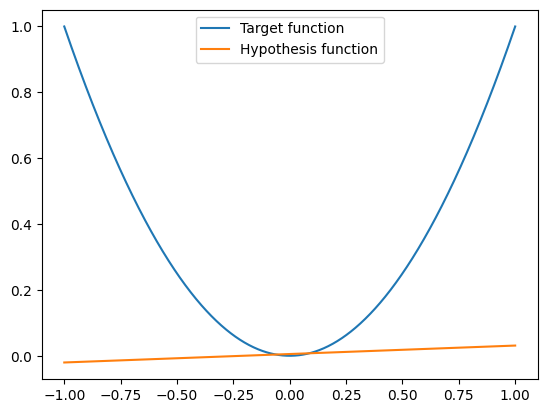

In [5]:
# Plot
x = np.linspace(-1, 1, size)
y = target_function(x)
plt.plot(x, y, label='Target function')
plt.plot(x, hypothesis_function(x, avg_a, avg_b), label='Hypothesis function')
plt.legend()
plt.show()

### 2.24 (E)

In [13]:
# TODO: Run experiment for quadratic hypothesis
def average_hypothesis(data_points):
    return np.mean(data_points)

def predict(x_train, y_train, y_test):
    size = len(x_train)
    E_out = 0
    avg = 0
    predictions = []
    for i in range(size):
        y = y_train[i]
        y_pred = average_hypothesis(y)
        error = np.mean((y_pred - y_test)**2)
        E_out += error
        predictions.append(y_pred)
        avg += y_pred
    E_out /= size
    avg /= size
    bias = np.mean((avg - y_test)**2)
    variance = np.mean([(predictions[i] - avg)**2 for i in range(size)])
    return E_out, bias, variance, avg
        
def run_experiment(N, d):
    x_train = generate_dataset(N, d)
    x_test = generate_dataset(N, d)
    y_train = target_function(x_train)
    y_test = target_function(x_test)
    E_out, bias, variance, avg = predict(x_train, y_train, y_test)
    print(f'Bias: {bias}')
    print(f'Variance: {variance}')
    print(f'Bias + Variance: {bias + variance}')
    print(f'E_out: {E_out}')
    # Plot
    x = np.linspace(-1, 1, N)
    y = target_function(x)
    plt.plot(x, y, label='Target function')
    plt.plot(x, avg * np.ones(N), label='Hypothesis function')
    plt.legend()
    plt.show()

Bias: 0.0905132054266262
Variance: 0.04365691256991716
Bias + Variance: 0.13417011799654338
E_out: 0.13417011799654346


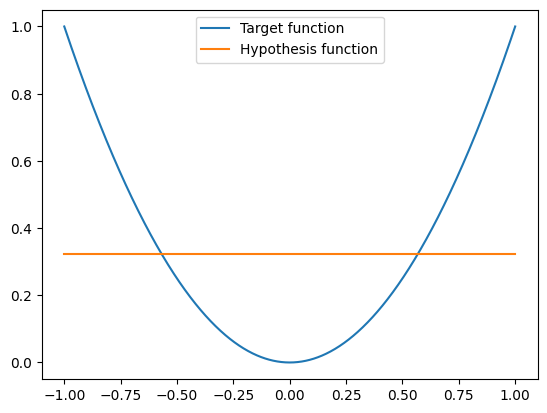

In [14]:
run_experiment(1000, 2)

Bias: 0.08982731400815125
Variance: 0.017829206385634924
Bias + Variance: 0.10765652039378618
E_out: 0.10765652039378619


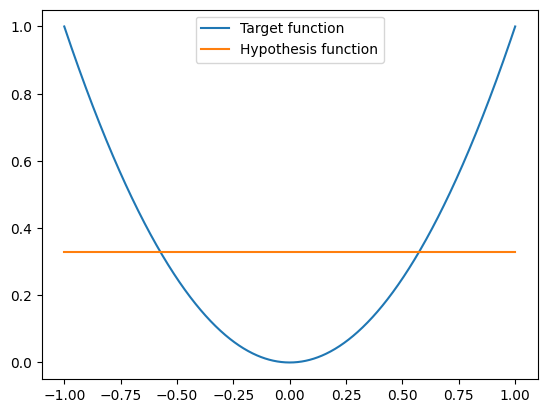

In [8]:
run_experiment(1000, 5)

Bias: 0.08858019268759429
Variance: 0.008454328134059415
Bias + Variance: 0.0970345208216537
E_out: 0.09703452082165376


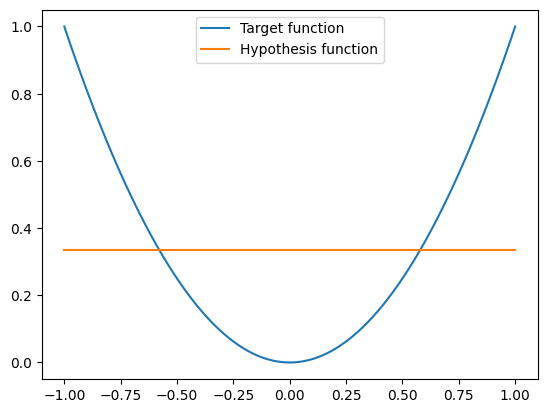

In [9]:
run_experiment(1000, 10)

Bias: 0.08838140779942504
Variance: 0.00436180291359487
Bias + Variance: 0.0927432107130199
E_out: 0.09274321071301986


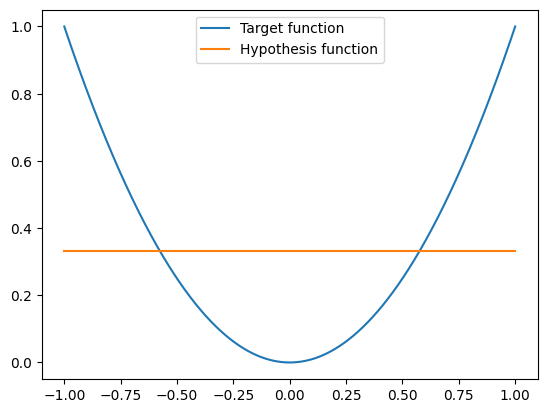

In [10]:
run_experiment(1000, 20)

In [ ]:
'''
Comment:
Bias almost remains unchanged for different number of data points because the average hypothesis is the same for all cases. Basically it's about how the model is able to capture the underlying pattern of the data & simplify things and since the hypothesis is constant then the bias won't change much.

Variance decreases as the number of data points increases due to the fact that the model gets exposed to more variations in the data and the predictions are more consistent.

Bias + Variance is almost exactly the same as E_out.

E_out decreases when more data points are trained which is expected because the model is able to generalize better and the predictions are closer to the true hypothesis.
'''